In [5]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Observing the devices that exists in tensorflow module
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Check if the GPU is build of cuda or not
tf.test.is_built_with_cuda()

True

### Observation of X_train and X_test shapes
* The X_train and X_test is of shape (500000,32,32,3) and (10000,32,32,3). So, the images are color image having three pixel values. In other words, every image is of shape (32,32,3). There are 50000 such images in X_train and 10000 such images in X_test. Number of pixels is 3 implies RGB image

* However, observing the shapes of y_train and y_test, it is evident that y_train and y_test contain classes only. The class stars from 0 to 9

In [6]:
# Load the 'CIFAR10'dataset from keras API
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (50000, 32, 32, 3)
Shape of X_test is: (10000, 32, 32, 3)
Shape of y_train is: (50000, 1)
Shape of y_test is: (10000, 1)


### Scaling the independent set
* X_train and X_test contains a matrix like structure, whose values ranges from 0 to 255. So, in order to scale it i.e. in order to make it between 0 and 1, we divide each number by 255

In [7]:
# Scaling the X_train and X_test values for better model performance
# Store the results in X_train_scale and X_test_scale variables
X_train_scale = X_train/255
X_test_scale = X_test/255

### Convert the y_train into vector form: One hot encoding

* In the section below, we will convert the y_train into numerical form from categorical form. Before transformation, the first sample class was 6. This becomes a vector whose 6th place is 1 after transformation

In [8]:
# Check the first 5 categories in y_train
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
# Convert the y_train data set into vector format: One hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
)

# Convert the y_test data set into vector format: One hot encoding
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
)

### Model building: Name the model as 'model'
* Use keras sequential
* The input layer is flattened to (32*32*3)
* The first hidden layer has 3000 nodes with relu activation
* The second hidden layer has 1000 nodes with relu activation
* The output layer has 10 nodes with sigmoid activation
* Compile the model with  SGD (stochastic gradient descent) optimizer, categorical cross-entropy loss and accuracy metrics
* Use X_train_scale and y_train_categorical to train the model
* Use  50 epochs

### Why we are using categorical cross-entropy?
* This depends on the dependent data set. We are building the model using y_train categorical and will check the performance using y_test categorical. So, it is not a discrete value. On the other hand, y_train and y_test were discrete value. So, if we use y_train and y_test instead of using y_train_categorical and y_test_categorical, we will use 'sparse categorical cross-entropy' loss instead of categorical cross-entropy loss

* So, whenever, we have one hot encoded categorical output values, use categorical cross-entropy loss

In [12]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)), # Flattened input layer
    keras.layers.Dense(3000, activation = 'relu'), # First hidden layer with 3000 nodes and relu
    keras.layers.Dense(1000, activation = 'relu'), # Second hidden layer with 1000 nodes and relu
    keras.layers.Dense(10, activation = 'sigmoid') # Output layer with 10 possible outcome nodes and sigmoid
])

# Compile the model
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Train the model with X_train_scale and y_train_categorical
model.fit(X_train_scale, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3022 - loss: 1.9330
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4202 - loss: 1.6442
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4493 - loss: 1.5602
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4748 - loss: 1.4910
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4931 - loss: 1.4357
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5107 - loss: 1.3935
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5241 - loss: 1.3542
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5364 - loss: 1.3232
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5501 - loss: 1.2832
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5598 - loss: 1.2613
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5747 - loss: 1.2207
Epoch 12/50
1563/1563 ━━━━━━━━

In [13]:
# Store the output classes in a list as classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
# Predicting the model outcomes on X_test_scale as y_pred
y_pred = model.predict(X_test_scale)
label = np.argmax(y_pred[0])
classes[label] == classes[y_test[0][0]] # Which is 'cat'

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


True

### Creating the confusion matrix and plotting it

* First, we already have the y_pred variable
* We need to get the class labels for every prediction in order to compare it with the y_test
* Use tf.math module to create confusion matrix
* plot the confusion matrix using seaborn

Text(95.72222222222221, 0.5, 'Actual')

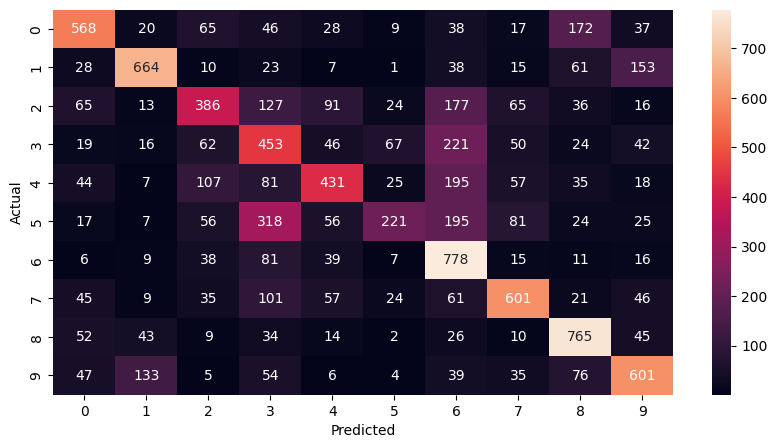

In [20]:
# Getting the labels for y_pred
y_pred_labels = [np.argmax(i) for i in y_pred]

# Calculate the confusion matrix
cnfm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

# Plotting the confusion matrix as heatmap
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(cnfm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')